# Linear discriminants and the least-squares method

Let's say we have a classification problem of $K$ classes. That is: for any given data point $x \in \mathbb{R}^D$, we want to decide to which class $k \in \underline{K}$ $x$ belongs. We are given a training set $x_1, \dots, x_N$, $x_i \in \mathbb{R}^D$ along their labels $t_1, \dots, t_N$ where $t_i \in \{0,1\}^K$, $(t_i)_j = 1 \iff x_i \text{ belongs to class } j$.

Obviously, we want to use the examples we have been given to estimate a function $r: \mathbb{R}^D \rightarrow \{0, 1\}$ that classifies any given data point as well as possible. How can we do this?

## Discriminant functions

One approach is to define what is called a discriminant function per possible class. A discriminant function for class $k \in \underline{K}$ is simply a function $y_k: \mathbb{R}^D \rightarrow \mathbb{R}$. To classify a point $x \in \mathbb{R}^D$, we choose the class $k$ whose discriminant function yields the heighest value: $$
    r: \mathbb{R}^D \rightarrow \underline{K}, x \mapsto \underset{k}{\operatorname{argmax}}\{y_k(x)\}
$$

## Linear discriminant functions

We haven't yet specified what kind of function the discriminants should be. In principle, we could use anything. For the beginning, we focus on simple linear functions:
$$y_k(x) = w_k^T \cdot x + w_{k,0} = w_{k,D} \cdot x_D + \dots + w_{k,1} \cdot x_1 + w_{k,0}$$
where $w_k \in \mathbb{R}^D$ is referred to as the weight vector and $w_{k,0} \in \mathbb{R}$ is referred to as bias term. Note that we could simplify this equation by setting $x_0 = 1$, thereby increasing the dimension of our $x$ by one and considering $w_{k,0}$ as another entry in the weight vector.

## Learning linear discriminant functions: the least-squares method

How could we go about learning a set of linear discriminant functions such that the error we make is minimized? Well, first we need to define what we mean by error. Notice that the error we make on a given training set $x_1, \dots, x_n$ with target vectors $t_1, \dots, t_n$ should be measured in terms of the weights $w_1, \dots, w_K$ of the $K$ discriminant functions $y_k$, as we plan to improve upon the weights and thus need to have a way of telling how "good" a certain set of weight vectors is.

When we use the least-squares-method of approximating the discriminant functions, we sum up the squared errors of classifying any point in the dataset with any discriminant function. Here is the formal definition:
$$
E(w_1, \dots, w_k \ | \ x_1, t_1, \dots , x_N, t_N) = \sum_{n=1}^N \sum_{k=1}^K ( y_k(x_n) - t_{n,k} )^2 \\
    = \sum_{n=1}^N \sum_{k=1}^K ( w_k^T \cdot x_n - t_{n,k} )^2
$$

Now, how can we minimize this error? The same way we have been minimizing functions in high school. We find the derivative with respect to the weight vectors and set it to zero. From that we can derive a minimizing condition. We could do this by taking the derivative of $E$ with respect to an arbitrary weight vector entry $w_{k,i}$, but that would take a lot of sum signs and indices. Instead, let us restate the problem as a matrix equation.

Let $W = \begin{pmatrix}w_1 \dots w_K\end{pmatrix} \in \mathbb{R}^{(D+1) \times K}$ be the matrix of our adapted weight vectors. Then $y_k(x) = (W^T \cdot x)_k$. We can thus define
$$
    y(x) = W^T \cdot x = \begin{pmatrix}y_1(x) \\ \dots \\ y_K(x)\end{pmatrix}
$$
If we evaluate $y(x_i)$ for a vector $x_i$ in the training set, we can set the goal that it should approximate the corresponding target vector $t_i$; that is: if $x_i$ belongs to class $k$, all entries of $y(x_i)$ that are not the $k$-th entry should be close to zero, and the $k$-th entry should be close to 1.

If we set the matrix $X = \begin{pmatrix} x_1^T \\ \dots \\ x_N^T\end{pmatrix} \in \mathbb{R}^{N \times (D+1)}$, we can evaluate $y(x_n)$ for all $n \in \underline{N}$ simultaneously:
$$
    W^T \cdot X^T = \begin{pmatrix}y_1(x_1) \dots y_1(x_N)\\ \dots \\ y_K(x_1) \dots y_K(x_N)\end{pmatrix} \overset{!}{=} \begin{pmatrix}t_1 \dots t_N\end{pmatrix}
$$
or, equivalently
$$
    X \cdot W = \begin{pmatrix}y_1(x_1) \dots y_K(x_1)\\ \dots \\ y_1(x_N) \dots y_K(x_N)\end{pmatrix} \overset{!}= \begin{pmatrix}t_1^T \\ \vdots \\ t_N^T\end{pmatrix} =: T
$$
where $X \cdot W \overset{!}= T$ is supposed to mean that we want $X \cdot W$ to be equal to $T$.

Now let us express the least-squares criterion in matrix notation. We use $\odot$ to denote the elementwise multiplication of two matrices.
$$
    E(W) = \frac{1}{2} \cdot \sum_{i,j} [(XW - T) \odot (XW - T)]_{i,j}
$$
We square every entry of the matrix $XW - T$ and sum all the entries of the resulting matrix. Using the identity $\sum_{i,j} a_{i,j}^2 = Tr(A^T \cdot A)$, where $Tr$ denotes the matrix trace (sum of the diagonal entries), we arrive at
$$
    E(W) = \frac{1}{2} \cdot Tr[(XW-T)^T \cdot (XW-T)]
$$
Let us now find the derivative with respect to the weights:
$$
    \frac{\partial E(W)}{\partial W} = \frac{1}{2} \frac{\partial}{\partial W} \cdot Tr[(XW-T)^T \cdot (XW-T)] \\
    = \frac{1}{2} \frac{\partial (XW-T)^T \cdot (XW-T)}{\partial W} \cdot \frac{\partial Tr[(XW-T)^T \cdot (XW-T)]}{\partial (XW-T)^T \cdot (XW-T)} \\
    = X^T \cdot (XW - T)
$$

To find a minimum, we set this derivative to zero:
$$
X^T \cdot (XW - T) = 0
$$
As we assume that $X \not= 0$, this is equivalent to
$$
    XW = T \\
    \iff X^T \cdot X \cdot W = X^T \cdot T \\
    \iff W = \underbrace{(X^T \cdot X)^{-1} \cdot X^T}_{\text{pseudo-inverse } X^\dagger} \cdot T
$$

We have thus found a direct expression for $W$ minimizing the squared error criterion! (Okay, we haven't verified that this is actually an optimum, but we could..)

Let us now try to use this result by applying it to a toy example.

## Experimenting with the least-squares method

We start of by generating two clusters of points in $\mathbb{R}^2$, drawn from independent Gaussian distributions.

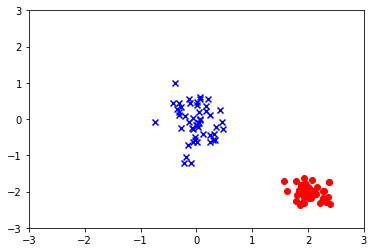

In [194]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

sampleSize = 50

meanA = np.array([0, 0])
varianceA = np.array([0.3, 0.5])
samplesA = np.random.normal(meanA, varianceA, (sampleSize, 2))

meanB = np.array([2, -2])
varianceB = np.array([0.2, 0.2])
samplesB = np.random.normal(meanB, varianceB, (sampleSize, 2))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim([-3, 3])
plt.ylim([-3, 3])

ax.scatter([x for [x, y] in samplesA], [y for [x, y] in samplesA], marker="x", color="b")
ax.scatter([x for [x, y] in samplesB], [y for [x, y] in samplesB], marker="o", color="r")

We now want to find linear discriminants $y_0$ and $y_1$ that classify all points in $\mathbb{R}^2$ as belonging to either the blue set of points or the red set of points. How can we visualize these discriminant functions? We can try to find the set of points $\{ x \in \mathbb{R}^2 | y_0(x) = y_1(x) \}$! As the discriminant functions are linear, the solution will be a subspace of $\mathbb{R}^2$. In particular, it will be a straight line! Suppose we are given the weight vectors $w, v \in \mathbb{R}^3$ of $y_0$ and $y_1$. How can we compute this decision boundary?

$$
    y_0(x) = w^T \cdot x = v^T \cdot x = y_1(x) \\
    \iff w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 = v_0 + v_1 \cdot x_1 + v_2 \cdot x_2 \\
    \iff x_2 = \frac{w_0 - v_0 + x_1 \cdot (w_1 - v_1)}{v_2 - w_2}
$$
Let's do this!

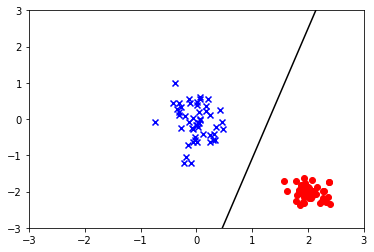

In [195]:
# add the 1s to the x vectors so that we can encode the bias as a weight
Xa = np.ones((sampleSize, 3))
Xa[:,1:] = samplesA
Xb = np.ones((sampleSize, 3))
Xb[:,1:] = samplesB

# build the complete data matrix X by concatenating Xa and Xb
X = np.concatenate((Xa, Xb))

# build the according target vectors
Ta = np.tile([1,0], (sampleSize, 1))
Tb = np.tile([0,1], (sampleSize, 1))
# and put them in one matrix
T = np.concatenate((Ta, Tb))

# numpy has a method for computing the pseudo-inverse directly,
# so this way we don't need to type it out ourselves
W = np.linalg.pinv(X) @ T

# extract the weight vectors of y_0 and y_1
w, v = W[:,0], W[:,1]

# plot the decision boundary
x = np.arange(-4, 4, 1)
y = (w[0] - v[0] + x * (w[1] - v[1])) / (v[2] - w[2])
ax.plot(x, y, color="black")
fig

Nice! This seems to have worked very well. But let's see what happens if our data isn't that easy to separate by a linear function. Let's add a couple of outliers to the blue data set.

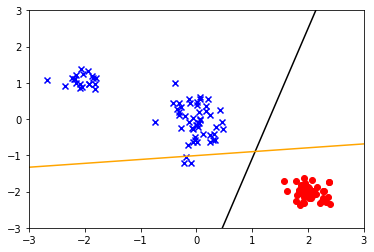

In [196]:
# let us add some outliers
num_outliers = 20

meanC = np.array([-2, 1])
varianceC = np.array([0.2, 0.2])
samplesC = np.random.normal(meanC, varianceC, (num_outliers, 2))

Xc = np.ones((num_outliers, 3))
Xc[:,1:] = samplesC

X = np.concatenate((Xa, Xc, Xb))
Tc = np.tile([1,0], (num_outliers, 1))
T = np.concatenate((Ta, Tc, Tb))

W = np.linalg.pinv(X) @ T


w, v = W[:,0], W[:,1]
# w is the weight vector of y_A, v is the weight vector of y_B

x = np.arange(-4, 4, 1)
y = (w[0] - v[0] + x * (w[1] - v[1])) / (v[2] - w[2])

ax.scatter([x for [x, y] in samplesC], [y for [x, y] in samplesC], marker="x", color="b")
ax.plot(x, y, color="orange")
fig

Hm. The black line, which is our old decision boundary, would still be a fine decision boundary, but our new decision boundary (orange) even misclassifies some of our data points. This shows us that the least-squares method is very sensitive to outliers.